 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path('Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df['Date'], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean() 
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algorithmic_returns_csv = Path("Resources/algo_returns.csv")
algorithmic_returns_df = pd.read_csv(algorithmic_returns_csv)
algorithmic_returns_df['Date'] = pd.to_datetime(algorithmic_returns_df["Date"], dayfirst = True)
algorithmic_returns_df.set_index(algorithmic_returns_df['Date'], inplace = True)
algorithmic_returns_df.drop(columns=['Date'],inplace = True)
algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algorithmic_returns_df.isnull().mean() 
algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algorithmic_returns_df = algorithmic_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path('Resources/sp_tsx_history.csv')
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df['Date'] = pd.to_datetime(sp_tsx_history_df['Date'], dayfirst = True)
sp_tsx_history_df.set_index(sp_tsx_history_df['Date'], inplace=True)
sp_tsx_history_df.drop(columns=['Date'],inplace=True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')
sp_tsx_history_df['Close']
sp_tsx_history_df = sp_tsx_history_df.sort_values('Date', ascending=True)
sp_tsx_history_df.head()

<ipython-input-8-b6045df02c77>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',','').astype('float')
sp_tsx_history_df['Close'].dtype

dtype('float64')

In [11]:
# Calculate Daily Returns
sp_tsx_history_df.isnull().sum()
sp_tsx_returns_df = sp_tsx_history_df.pct_change()
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_returns_df.pct_change()
sp_tsx_returns_df.dropna(inplace=True)
sp_tsx_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df = sp_tsx_returns_df.rename(columns={'Close':'S&P TSX 60'})
sp_tsx_returns_df.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_portfolios_df = pd.concat([whale_returns_df,algorithmic_returns_df, sp_tsx_returns_df], axis='columns', join='inner')
Combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

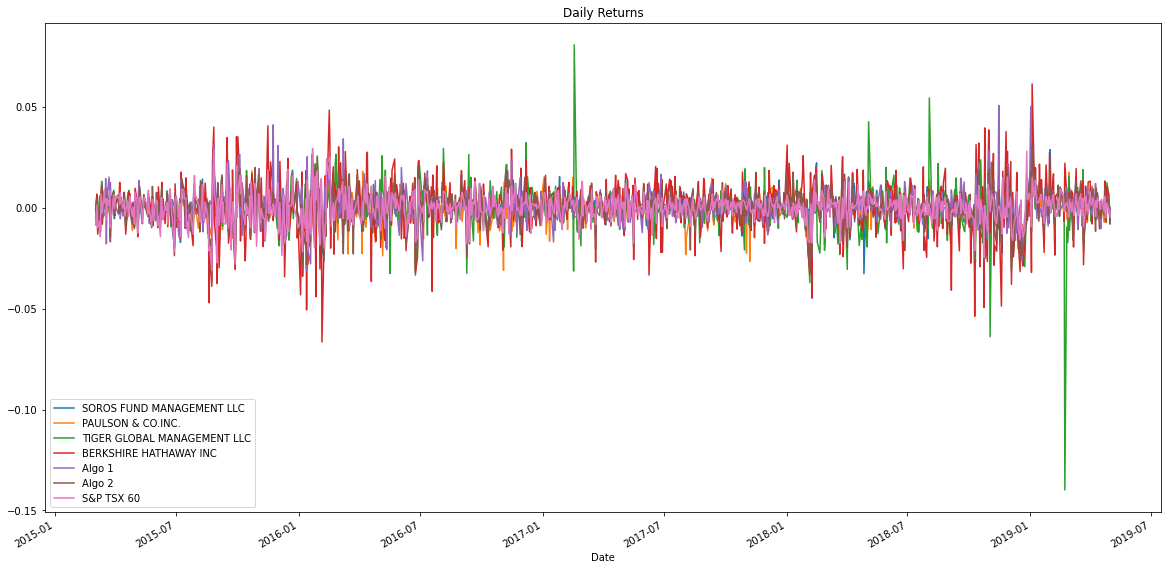

In [15]:
# Plot daily returns of all portfolios
Combined_portfolios_df.plot( title='Daily Returns' , figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
Combined_portfolios_df_cumulative_returns = ((1 + Combined_portfolios_df).cumprod())-1
Combined_portfolios_df_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

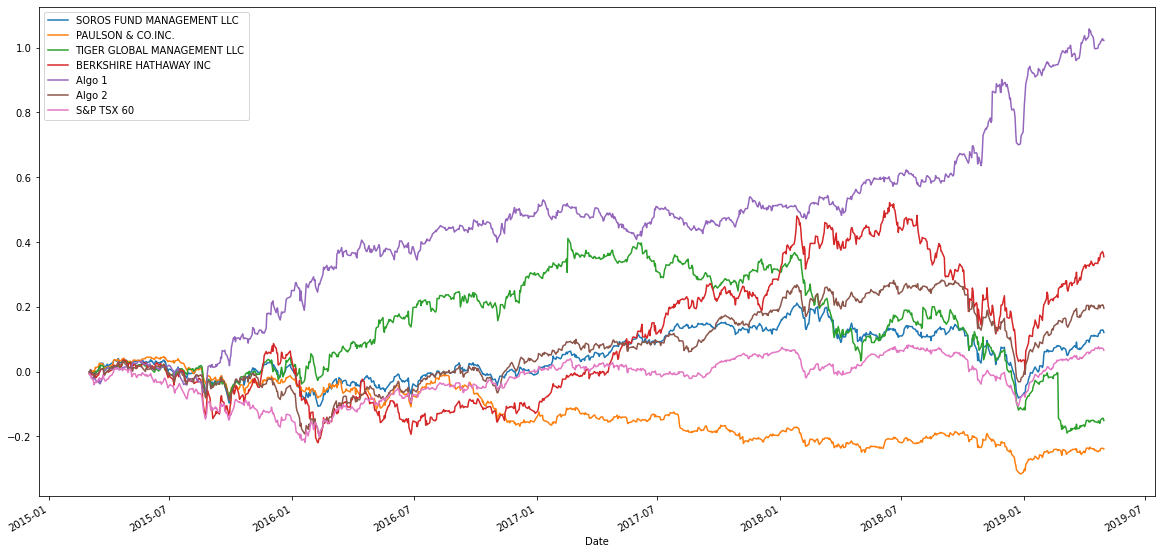

In [17]:
# Plot cumulative returns
Combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

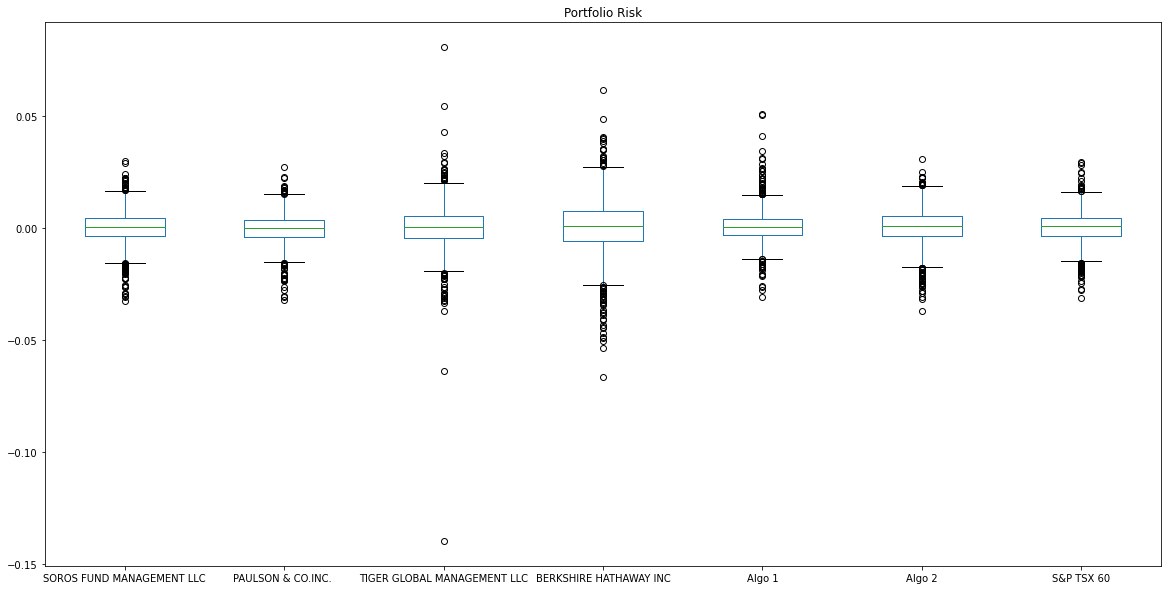

In [18]:
# Box plot to visually show risk
Combined_portfolios_df.plot.box(title= 'Portfolio Risk', figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = Combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_daily_std = sp_tsx_returns_df.std()
sp_daily_std

S&P TSX 60    0.006637
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_sp_tsx =(daily_std > sp_daily_std['S&P TSX 60'])
portfolios_riskier_than_sp_tsx.head()

BERKSHIRE HATHAWAY INC         True
TIGER GLOBAL MANAGEMENT LLC    True
Algo 2                         True
SOROS FUND MANAGEMENT LLC      True
Algo 1                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Combined_portfolios_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

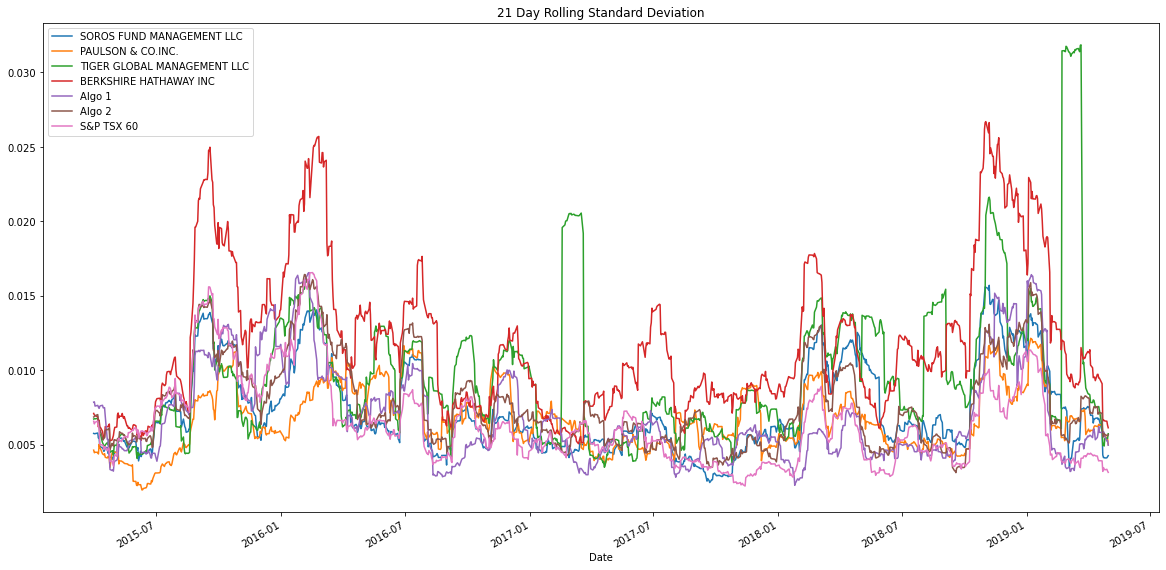

In [24]:
# Plot the rolling standard deviation
Combined_portfolios_df.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation', figsize=(20,10))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = Combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

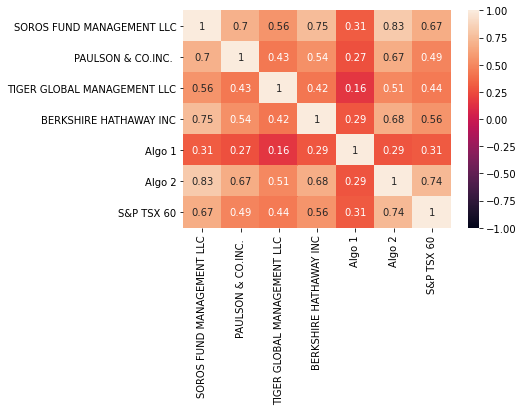

In [26]:
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [27]:
# Calculate covariance of a single portfolio
algorithm_2_covariance = Combined_portfolios_df['Algo 2'].rolling(window=60).cov(Combined_portfolios_df['S&P TSX 60'])
algorithm_2_covariance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64

In [28]:
# Calculate variance of S&P TSX
variance = Combined_portfolios_df['S&P TSX 60'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1029, dtype: float64

In [29]:
# Computing beta
algorithm_2_beta = algorithm_2_covariance / variance
algorithm_2_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.014041
2019-04-26    1.014918
2019-04-29    0.991566
2019-04-30    1.008943
2019-05-01    1.020958
Length: 1029, dtype: float64

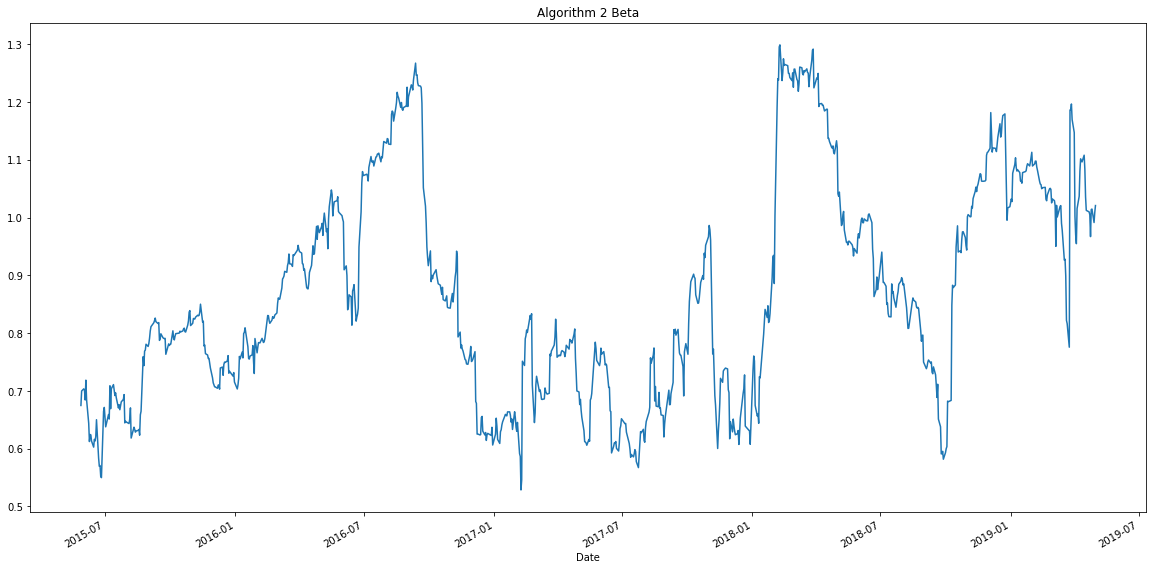

In [30]:
# Plot beta trend
algorithm_2_beta_plot = algorithm_2_beta.plot(title='Algorithm 2 Beta', figsize=(20, 10))

In [31]:
# Calculate cumulative returns of all portfolios
Combined_portfolios_df_cumulative_returns = ((1 + Combined_portfolios_df).cumprod())-1
Combined_portfolios_df_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

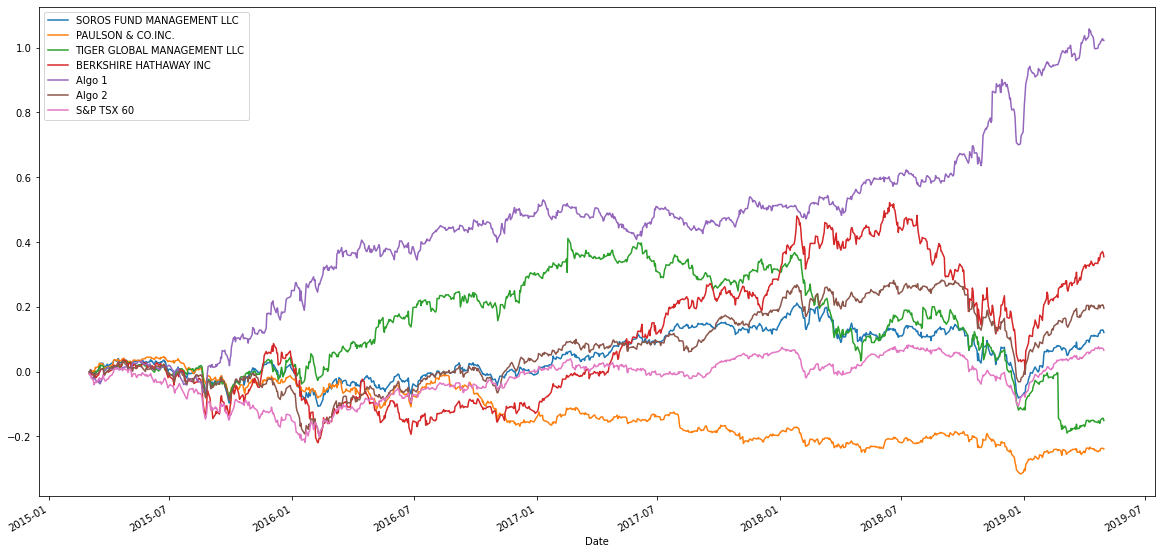

In [32]:
# Plot cumulative returns
Combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = Combined_portfolios_df.ewm(halflife=21, adjust=True).std()
rolling_window_ewma.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

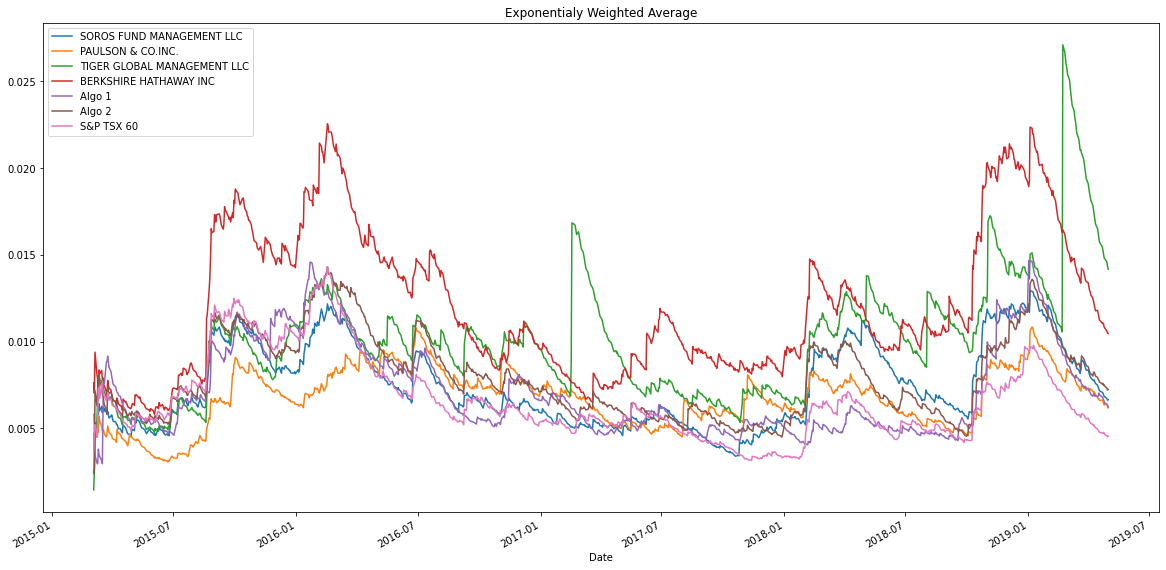

In [34]:
# Use `ewm` to calculate and plot the rolling window
rolling_window_ewma = Combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title='Exponentialy Weighted Average', figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
Annualized_sharpe_ratios = (Combined_portfolios_df.mean() * 252) / (Combined_portfolios_df.std() * np.sqrt(252))
Annualized_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

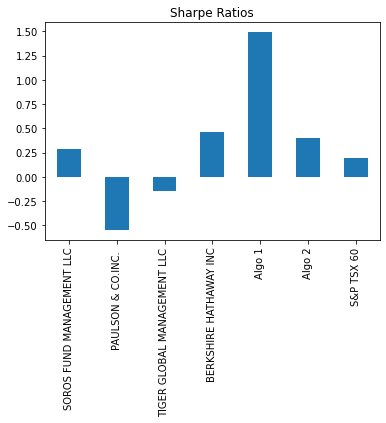

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = (Combined_portfolios_df.mean() * 252) / (Combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios.plot(kind ='bar', title= 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [37]:
# Reading data from 1st stock
AMAZON_Historical_csv = Path('Resources/AMAZON_Historical.csv')
AMAZON_Historical_df = pd.read_csv(AMAZON_Historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
AMAZON_Historical_df.head()


,Close
Date,
2015-02-01,308.52
2015-05-01,302.19
2015-06-01,295.29
2015-07-01,298.42
2015-08-01,300.46


In [38]:
# Reading data from 1st stock
APPLE_Historical_csv = Path('Resources/APPLE_Historical.csv')
APPLE_Historical_df = pd.read_csv(APPLE_Historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
APPLE_Historical_df.head()

,Close
Date,
2015-02-01,27.33
2015-05-01,26.56
2015-06-01,26.57
2015-07-01,26.94
2015-08-01,27.97


In [39]:
# Reading data from 1st stock
DISNEY_Historical_csv = Path('Resources/DISNEY_Historical.csv')
DISNEY_Historical_df = pd.read_csv(DISNEY_Historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
DISNEY_Historical_df.head()

,Close
Date,
2015-02-01,93.75
2015-05-01,92.38
2015-06-01,91.89
2015-07-01,92.83
2015-08-01,93.79


In [40]:
# Reading data from 2nd stock
GOOGLE_Historical_csv = Path('Resources/GOOGLE_Historical.csv')
GOOGLE_Historical_df = pd.read_csv(GOOGLE_Historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
GOOGLE_Historical_df.head()

,Close
Date,
2015-02-01,523.37
2015-05-01,512.46
2015-06-01,500.59
2015-07-01,499.73
2015-08-01,501.30


In [41]:
# Reading data from 3rd stock
NETFLIX_Historical_csv = Path('Resources/NETFLIX_Historical.csv')
NETFLIX_Historical_df = pd.read_csv(NETFLIX_Historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
NETFLIX_Historical_df.head()

,Close
Date,
2015-02-01,49.85
2015-05-01,47.31
2015-06-01,46.50
2015-07-01,46.74
2015-08-01,47.78


In [42]:
# Combine all stocks in a single DataFrame
Combined_stocks_portfolio_df = pd.concat([AMAZON_Historical_df, APPLE_Historical_df, DISNEY_Historical_df,GOOGLE_Historical_df,NETFLIX_Historical_df], axis='columns', join='inner')
Combined_stocks_portfolio_df

,Close,Close,Close,Close,Close
Date,,,,,
2015-02-01,308.52,27.33,93.75,523.37,49.85
2015-05-01,302.19,26.56,92.38,512.46,47.31
2015-06-01,295.29,26.57,91.89,500.59,46.50
2015-07-01,298.42,26.94,92.83,499.73,46.74
2015-08-01,300.46,27.97,93.79,501.30,47.78
...,...,...,...,...,...
2015-12-23,663.70,27.15,105.56,750.31,118.16
2015-12-24,662.79,27.01,105.86,748.40,117.33
2015-12-28,675.20,26.71,107.25,762.51,117.11


In [43]:
# Reset Date index
Combined_stocks_portfolio_df.sort_index(inplace=True)
Combined_stocks_portfolio_df

,Close,Close,Close,Close,Close
Date,,,,,
2015-01-04,370.26,31.06,105.44,541.07,59.02
2015-01-05,422.87,32.24,110.52,537.90,79.58
2015-01-06,430.92,32.63,110.96,533.99,89.00
2015-01-07,437.39,31.65,115.13,521.84,93.64
2015-01-09,496.54,26.93,99.51,597.79,105.79
...,...,...,...,...,...
2015-12-23,663.70,27.15,105.56,750.31,118.16
2015-12-24,662.79,27.01,105.86,748.40,117.33
2015-12-28,675.20,26.71,107.25,762.51,117.11


In [44]:
# Reorganize portfolio data by having a column per symbol
Combined_stocks_portfolio_df.columns = ['AMAZON','APPLE','DISNEY','GOOGLE','NETFLIX']
Combined_stocks_portfolio_df

,AMAZON,APPLE,DISNEY,GOOGLE,NETFLIX
Date,,,,,
2015-01-04,370.26,31.06,105.44,541.07,59.02
2015-01-05,422.87,32.24,110.52,537.90,79.58
2015-01-06,430.92,32.63,110.96,533.99,89.00
2015-01-07,437.39,31.65,115.13,521.84,93.64
2015-01-09,496.54,26.93,99.51,597.79,105.79
...,...,...,...,...,...
2015-12-23,663.70,27.15,105.56,750.31,118.16
2015-12-24,662.79,27.01,105.86,748.40,117.33
2015-12-28,675.20,26.71,107.25,762.51,117.11


In [45]:
# Calculate daily returns
# Drop NAs
Combined_stocks_portfolio_df.isnull().sum()
Combined_stocks_portfolio_returns_df = Combined_stocks_portfolio_df.pct_change()
Combined_stocks_portfolio_returns_df.dropna(inplace=True)

# Display sample data
Combined_stocks_portfolio_returns_df.columns = ['AMAZON','APPLE','DISNEY','GOOGLE','NETFLIX']
Combined_stocks_portfolio_returns_df.head()

,AMAZON,APPLE,DISNEY,GOOGLE,NETFLIX
Date,,,,,
2015-01-05,0.142089,0.037991,0.048179,-0.005859,0.348356
2015-01-06,0.019037,0.012097,0.003981,-0.007269,0.118371
2015-01-07,0.015014,-0.030034,0.037581,-0.022753,0.052135
2015-01-09,0.135234,-0.149131,-0.135673,0.145543,0.129752
2015-01-10,0.048697,0.017453,0.031756,0.022583,0.001796


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
weighted_portfolio_returns =Combined_stocks_portfolio_returns_df.dot(weights)

# Display sample data
weighted_portfolio_returns

Date
2015-01-05    0.114151
2015-01-06    0.029243
2015-01-07    0.010389
2015-01-09    0.025145
2015-01-10    0.024457
                ...   
2015-12-23    0.003877
2015-12-24   -0.002651
2015-12-28    0.007545
2015-12-29    0.015965
2015-12-30   -0.010931
Length: 250, dtype: float64

In [47]:
# Calculate portfolio return
weighted_portfolio_returns = weighted_portfolio_returns.rename('Retirement')
# Display sample data
weighted_portfolio_returns

Date
2015-01-05    0.114151
2015-01-06    0.029243
2015-01-07    0.010389
2015-01-09    0.025145
2015-01-10    0.024457
                ...   
2015-12-23    0.003877
2015-12-24   -0.002651
2015-12-28    0.007545
2015-12-29    0.015965
2015-12-30   -0.010931
Name: Retirement, Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
Combined_stocks_portfolio_2_df = pd.concat([whale_returns_df,algorithmic_returns_df, sp_tsx_returns_df,weighted_portfolio_returns], axis='columns', join='inner')
Combined_stocks_portfolio_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Retirement
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.080286
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.088065
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.084905
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.151882
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.034289


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

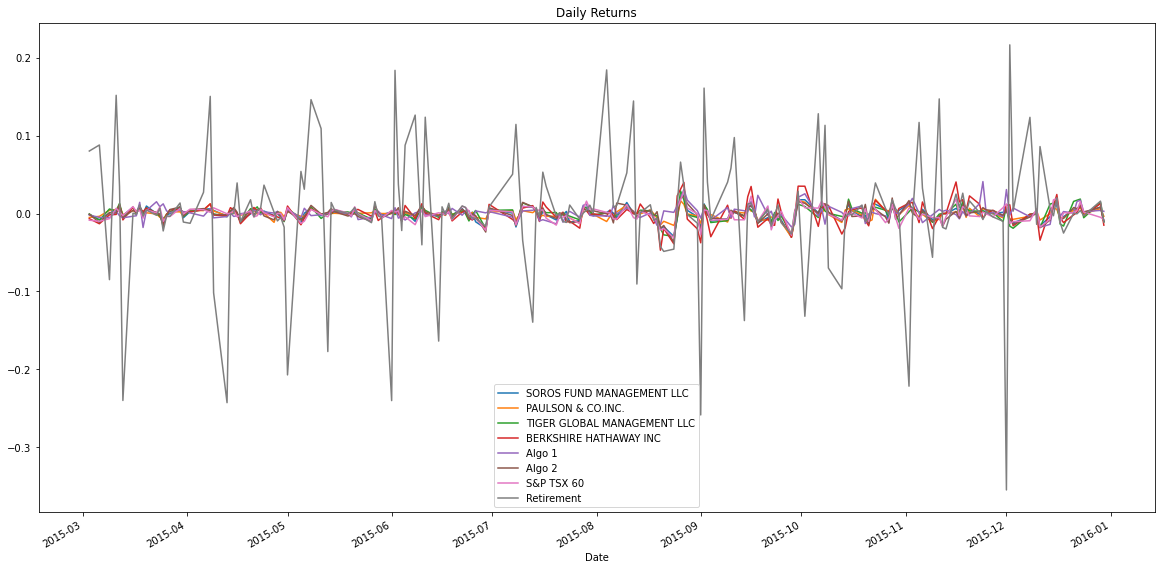

In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Combined_stocks_portfolio_2_df.plot( title='Daily Returns' , figsize=(20,10))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
Combined_stocks_portfolio_2_df_annualized_std = Combined_stocks_portfolio_2_df *np.sqrt(252)
Combined_stocks_portfolio_2_df_annualized_std


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Retirement
Date,,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407,1.274508
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302,1.397989
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054,-1.347824
2015-03-11,0.063687,0.081962,0.052574,-0.018203,0.047526,0.009600,0.105644,2.411050
2015-03-12,0.131197,0.163057,0.208224,0.171467,-0.046587,0.185210,0.033948,0.544325
...,...,...,...,...,...,...,...,...
2015-12-22,0.087446,0.061631,0.270317,0.024742,0.243823,0.102166,0.059044,-0.005545
2015-12-23,0.141910,0.128050,0.295203,0.169488,0.272550,0.154106,0.245164,0.061552
2015-12-24,0.008397,-0.007614,-0.085740,-0.040242,0.036901,0.030692,0.029742,-0.042085


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

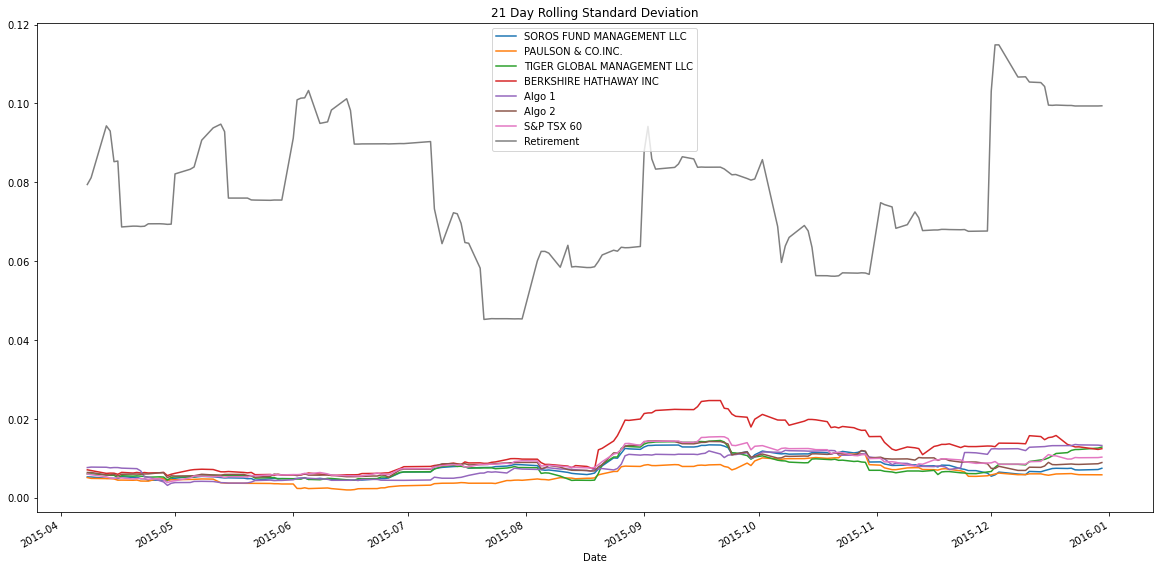

In [51]:
# Calculate rolling standard deviation
Combined_stocks_portfolio_2_df.rolling(window=21).std()
Combined_stocks_portfolio_2_df

# Plot rolling standard deviation
Combined_stocks_portfolio_2_df.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation', figsize=(20,10))

### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
Combined_stocks_portfolio_2_df_correlation = Combined_stocks_portfolio_2_df.corr()
Combined_stocks_portfolio_2_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Retirement
SOROS FUND MANAGEMENT LLC,1.000000,0.818704,0.839982,0.776116,0.434705,0.872199,0.794951,0.069220
PAULSON & CO.INC.,0.818704,1.000000,0.734589,0.669505,0.401133,0.731425,0.618530,0.019243
TIGER GLOBAL MANAGEMENT LLC,0.839982,0.734589,1.000000,0.701116,0.323565,0.809945,0.723579,0.080646
BERKSHIRE HATHAWAY INC,0.776116,0.669505,0.701116,1.000000,0.376077,0.709222,0.684080,0.103445
Algo 1,0.434705,0.401133,0.323565,0.376077,1.000000,0.349222,0.416291,-0.106029
Algo 2,0.872199,0.731425,0.809945,0.709222,0.349222,1.000000,0.786496,0.095029
S&P TSX 60,0.794951,0.618530,0.723579,0.684080,0.416291,0.786496,1.000000,0.020704
Retirement,0.069220,0.019243,0.080646,0.103445,-0.106029,0.095029,0.020704,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

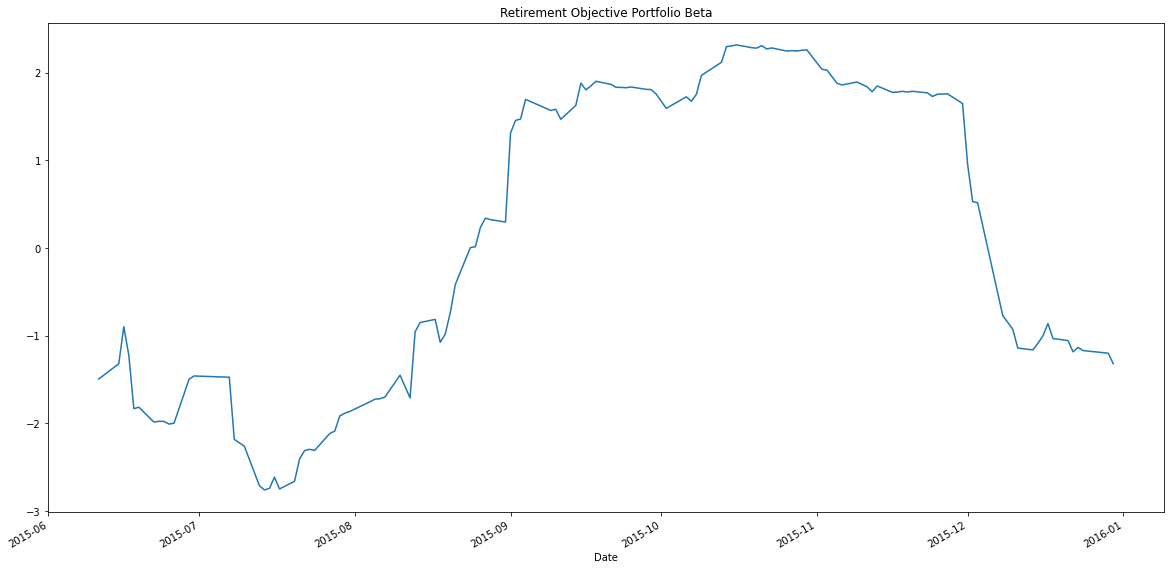

In [53]:
# Calculate and plot Beta
variance_2 = Combined_stocks_portfolio_2_df['S&P TSX 60'].rolling(window=60).var()
variance_2
Retirement_Obj_covariance = Combined_stocks_portfolio_2_df['Retirement'].rolling(window=60).cov(Combined_stocks_portfolio_2_df['S&P TSX 60'])
Retirement_Obj_beta = Retirement_Obj_covariance / variance_2
Retirement_Obj_beta_plot = Retirement_Obj_beta.plot(title='Retirement Objective Portfolio Beta', figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualzied Sharpe Ratios
Combined_stocks_portfolio_2_df_sharpe_ratios = (Combined_stocks_portfolio_2_df.mean() * 252) / (Combined_stocks_portfolio_2_df.std() * np.sqrt(252))
Combined_stocks_portfolio_2_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         2.028868
Retirement                     0.591240
TIGER GLOBAL MANAGEMENT LLC    0.327736
BERKSHIRE HATHAWAY INC         0.149215
SOROS FUND MANAGEMENT LLC     -0.174173
Algo 2                        -0.442133
PAULSON & CO.INC.             -0.597116
S&P TSX 60                    -1.116444
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

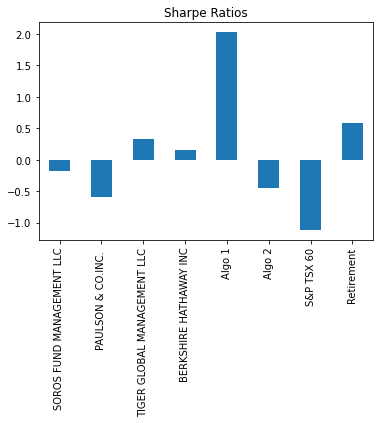

In [55]:
# Visualize the sharpe ratios as a bar plot
Combined_stocks_portfolio_2_df_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!